In [218]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

from sklearn.pipeline import Pipeline,make_pipeline
df=pd.read_csv("/Users/Xugao/Desktop/Covid Data.csv")

In [279]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.shape

(1048575, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [12]:
df['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
10/01/2021         1
16/03/2021         1
02/01/2021         1
31/03/2021         1
19/12/2020         1
Name: DATE_DIED, Length: 401, dtype: int64

In [295]:
# died groups

x = df[df["DATE_DIED"]!="9999-99-99"]

x["DATE"]=pd.to_datetime(x["DATE_DIED"])

x["Year"]=x["DATE"].dt.year

x["Month"]=x["DATE"].dt.month

x["day"]=x["DATE"].dt.day
x

<ipython-input-295-b95685afe921>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["DATE"]=pd.to_datetime(x["DATE_DIED"])
<ipython-input-295-b95685afe921>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Year"]=x["DATE"].dt.year
<ipython-input-295-b95685afe921>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DATE,Year,Month,day
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,2,2,3,97,2020-03-05,2020,3,5
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,1,2,5,97,2020-03-06,2020,3,6
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,3,2,2020-09-06,2020,9,6
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,7,97,2020-12-06,2020,12,6
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,2,2,3,97,2020-06-21,2020,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,18/07/2020,1,1,73,97,2,...,2,1,2,2,3,2,2020-07-18,2020,7,18
1047636,1,13,2,1,26/07/2020,97,1,82,97,2,...,2,2,2,2,3,97,2020-07-26,2020,7,26
1047637,1,13,1,1,27/07/2020,97,1,82,2,2,...,2,2,2,2,3,97,2020-07-27,2020,7,27
1047638,1,13,2,2,29/07/2020,1,1,80,97,2,...,2,1,2,2,3,2,2020-07-29,2020,7,29


In [296]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

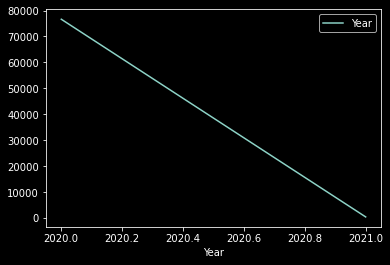

In [302]:
s= x.groupby('Year')[["Year"]].aggregate('count')

plt.style.use('dark_background')
s.plot(y="Year")

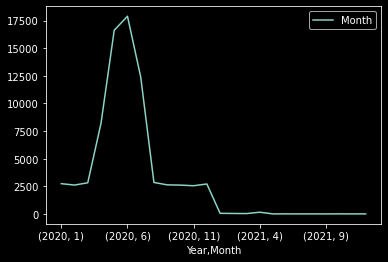

In [304]:
q= x.groupby(['Year','Month'])[["Month"]].aggregate('count')

plt.style.use('dark_background')
q.plot(y="Month")

In [219]:
# 9999-99-99 means recoverdd while and specific dates means died

df["DATE_DIED"] = df["DATE_DIED"].apply(lambda x: 0 if x == "9999-99-99" else 1)

In [6]:
# CHECK TARGET VALUES DISTRIBUTION

df['DATE_DIED'].value_counts()

0    971633
1     76942
Name: DATE_DIED, dtype: int64

In [220]:
# RESIZE DATASET TO 1%

df = df.groupby('DATE_DIED', group_keys=False).apply(lambda x: x.sample(frac=0.01))

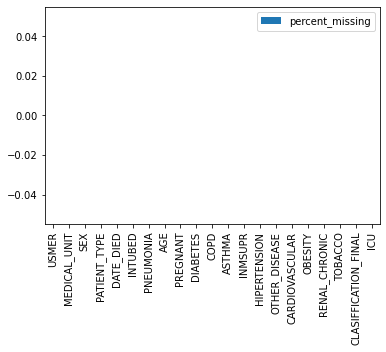

In [8]:
percent_missing = df.isnull().sum()/len(df)

missing_value_df = pd.DataFrame({'columns':df.columns.name,'percent_missing':percent_missing})
missing_value_df.plot(kind='bar')

In [17]:
col = df.columns

for i in col:
    print(df[i].value_counts())
    print('-----------')

2    6566
1    3919
Name: USMER, dtype: int64
-----------
12    5987
4     3160
6      411
9      401
3      190
8      118
10      78
5       67
11      56
13       9
7        8
Name: MEDICAL_UNIT, dtype: int64
-----------
2    5307
1    5178
Name: SEX, dtype: int64
-----------
1    8430
2    2055
Name: PATIENT_TYPE, dtype: int64
-----------
0    9716
1     769
Name: DATE_DIED, dtype: int64
-----------
97    8430
2     1637
1      345
99      73
Name: INTUBED, dtype: int64
-----------
2     8883
1     1430
99     172
Name: PNEUMONIA, dtype: int64
-----------
30    298
36    277
34    260
28    254
35    252
     ... 
95      4
92      3
98      2
96      1
93      1
Name: AGE, Length: 98, dtype: int64
-----------
97    5307
2     5059
1       90
98      29
Name: PREGNANT, dtype: int64
-----------
2     9232
1     1223
98      30
Name: DIABETES, dtype: int64
-----------
2     10309
1       147
98       29
Name: COPD, dtype: int64
-----------
2     10187
1       276
98       22
Name: AS

## EDA

In [8]:
plt.figure(figsize=(15,10))
df.groupby('DATE_DIED').aggregate('count').plot(kind='pie',figsize=(10,8))

ValueError: pie requires either y column or 'subplots=True'

<Figure size 1080x720 with 0 Axes>

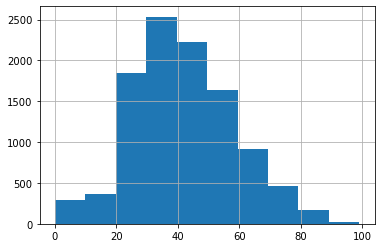

In [9]:
df['AGE'].hist(bins=10)

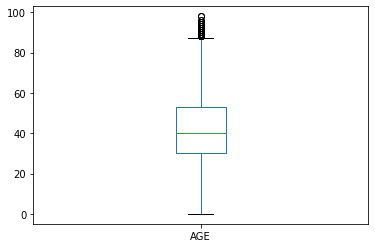

In [20]:
df.AGE.plot(kind='box')

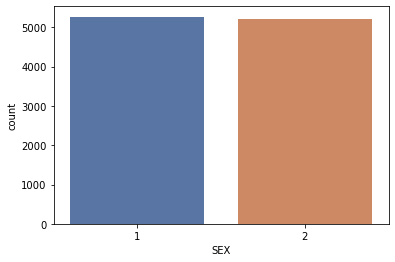

In [11]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['SEX'], palette='deep')


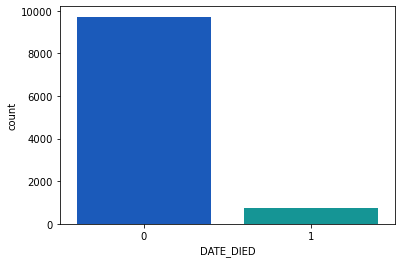

In [12]:
ax = sns.countplot(df['DATE_DIED'],palette='winter')

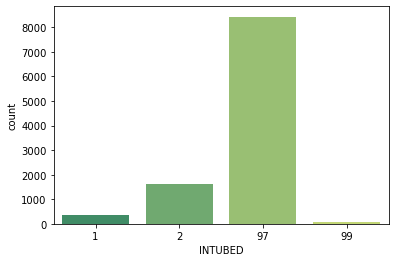

In [23]:
ax = sns.countplot(df['INTUBED'],palette='summer')

In [186]:
survived=df[df["DATE_DIED"]==0]

died = df[df["DATE_DIED"]==1]

died

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
37747,1,4,female,2,1,2,2,67,97,1,...,2,2,1,2,2,2,1,1,3,2
739,1,3,female,2,1,2,1,46,97,1,...,2,2,2,2,2,2,2,2,3,2
22129,1,4,female,2,1,2,1,72,97,1,...,2,2,1,2,2,2,2,2,6,2
36696,2,4,male,2,1,2,2,66,2,2,...,2,2,1,2,2,2,2,2,7,2
47857,2,4,female,2,1,2,2,43,97,2,...,2,2,2,2,2,2,2,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459644,2,12,male,2,1,2,1,55,2,1,...,2,2,2,2,2,2,2,2,6,2
49959,1,4,female,2,1,1,1,37,97,2,...,2,2,1,2,2,2,2,2,3,2
459683,1,12,female,2,1,2,1,75,97,1,...,2,2,2,2,2,2,2,2,1,2
43693,1,4,female,2,1,2,1,40,97,2,...,2,2,1,2,2,2,2,2,3,2


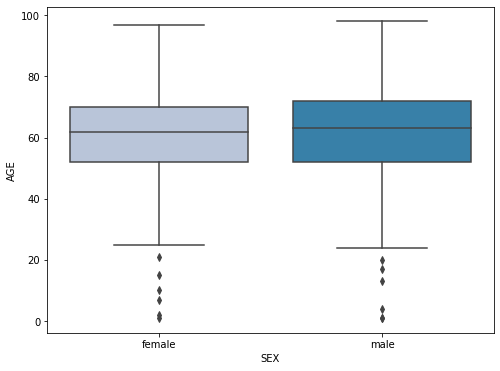

In [187]:
# died, age distribution based on sex
plt.figure(figsize=(8,6))
sns.boxplot(died["SEX"],died['AGE'],palette='PuBu')

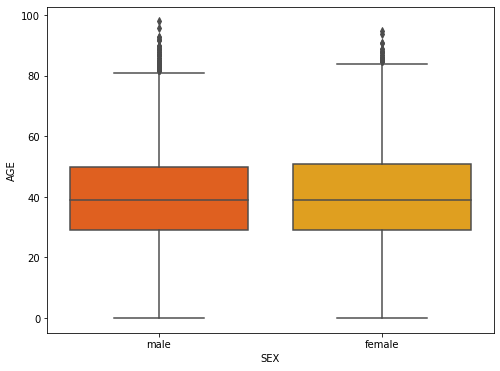

In [188]:
# survived, age distribution based on sex

plt.figure(figsize=(8,6))
sns.boxplot(survived["SEX"],survived['AGE'],palette='autumn')

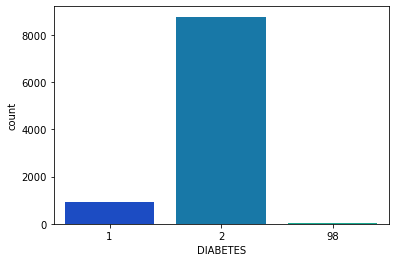

In [189]:
ax = sns.countplot(survived['DIABETES'],palette='winter')

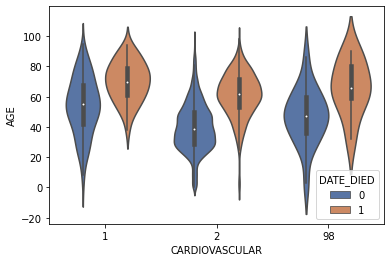

In [27]:

sns.violinplot(x='CARDIOVASCULAR',y='AGE',data=df,hue='DATE_DIED', palette='deep')

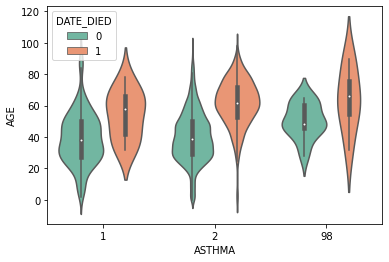

In [28]:
sns.violinplot(x='ASTHMA',y='AGE',data=df,hue='DATE_DIED', palette='Set2')

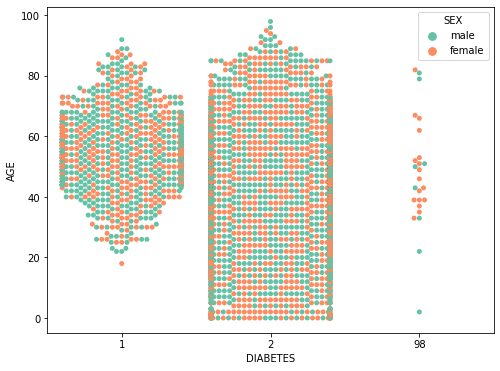

In [195]:
# diabetes distribution based on sex among survived

plt.figure(figsize=(8,6))

sns.swarmplot(x='DIABETES',y='AGE',data=survived,hue='SEX', palette='Set2')

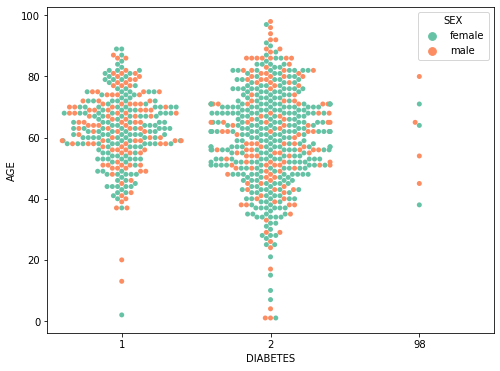

In [192]:
# diabetes distribution based on sex among died

plt.figure(figsize=(8,6))

sns.swarmplot(x='DIABETES',y='AGE',data=died,hue='SEX', palette='Set2')

In [29]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['DATE_DIED'])
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['DATE_DIED'])
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left',frameon=False)
    plt.legend(loc="upper left")
    plt.show()

DATE_DIED     0    1
INTUBED             
1            67  278
2          1232  405
97         8374   56
99           43   30
------------------------------------------------------------------------------------------------------------------------


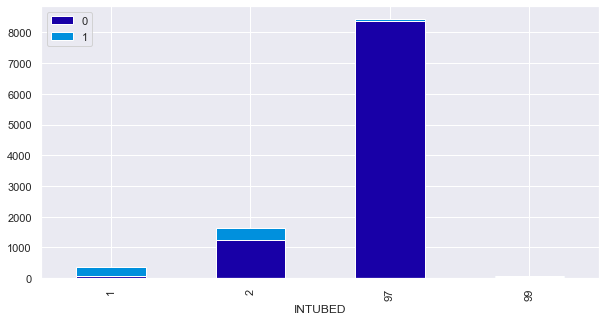

In [30]:
stacked_plot(df['INTUBED'])

DATE_DIED     0    1
PNEUMONIA           
1           906  524
2          8650  233
99          160   12
------------------------------------------------------------------------------------------------------------------------


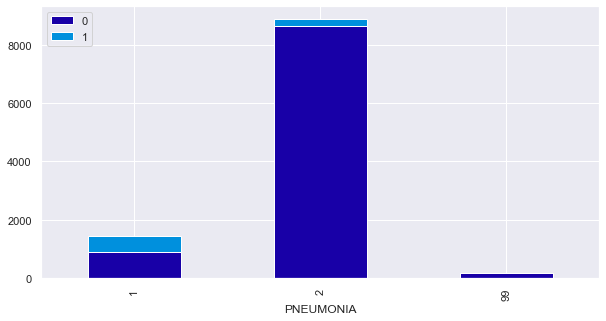

In [31]:
stacked_plot(df['PNEUMONIA'])

DATE_DIED     0    1
INMSUPR             
1           104   26
2          9591  734
98           21    9
------------------------------------------------------------------------------------------------------------------------


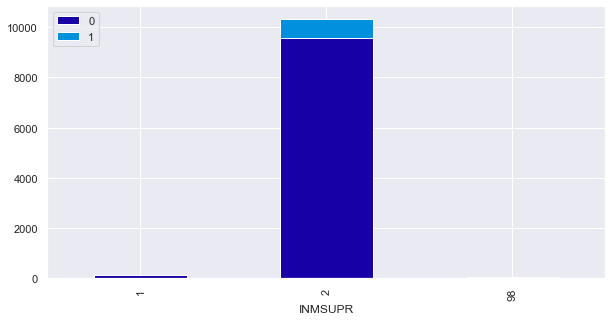

In [32]:
stacked_plot(df['INMSUPR'])

DATE_DIED     0    1
OBESITY             
1          1368  193
2          8332  568
98           16    8
------------------------------------------------------------------------------------------------------------------------


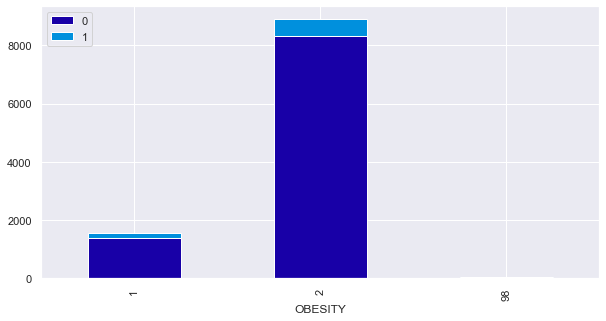

In [33]:
stacked_plot(df['OBESITY'])

DATE_DIED         0    1
RENAL_CHRONIC           
1               154   58
2              9546  702
98               16    9
------------------------------------------------------------------------------------------------------------------------


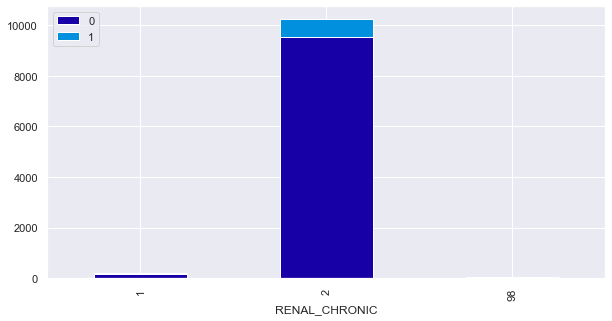

In [34]:
stacked_plot(df['RENAL_CHRONIC'])

DATE_DIED     0    1
TOBACCO             
1           735   63
2          8964  697
98           17    9
------------------------------------------------------------------------------------------------------------------------


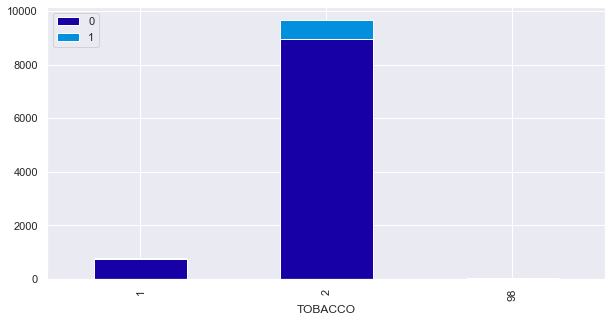

In [35]:
stacked_plot(df['TOBACCO'])

In [221]:
col_list = df.columns.tolist()
col_list

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']

## Feature engineering

In [222]:
#write a function to convert 97,98,99(indicates missing values) 
#invalid value to NAN

#def con_invalid_na(i):
    
for i in col_list:
    
    df[i]=df[i].replace(97,np.nan)
    df[i]=df[i].replace(98,np.nan)
    df[i]=df[i].replace(99,np.nan)
    
     #return df

In [223]:
df['SEX'] =df['SEX'].apply(lambda x: "male" if x==1 else "female")

In [224]:
# change int to category variable

for i in col_list:
    df[i] = df[i].astype('category')

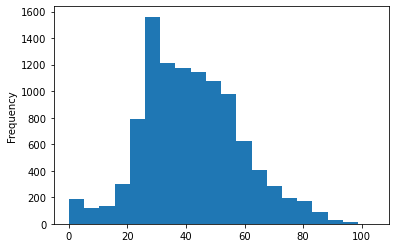

In [38]:
df['AGE'].plot.hist(stacked=True, bins=20)

In [225]:
df.drop(columns=['MEDICAL_UNIT'],inplace=True)

In [226]:
# create age bin column

df['AGE_Bin']= pd.cut(x=df['AGE'], bins=[1,20,40,60,80,100],
                     labels =['1-20','21-40','41-60','61-80','81-100'])


In [227]:
# categorize the classification_final (1-7 originally)

def clasification_level(i):
    if i in [1,2,3]:
        return "light level"

    elif i in [4,5]:
        return "medium_serious level"
    elif i in [6,7]:
        return "serious level"

In [228]:
df['Classification_level']=df['CLASIFFICATION_FINAL'].apply(clasification_level)

In [231]:
# define a function that categorize risk death based two consitions: classification level, agebin

def high_risk_dead(row):
    
    Classification_level = row[-1]
    
    AGE_Bin = row[-2]
    
    if Classification_level == "serious level" and AGE_Bin=='61-80':
         return "high risk of death"
    elif Classification_level == "serious level" and AGE_Bin=='81-100':
         return "extreme high risk of death"
    else:
        
        return "low-medium risk of death"

In [230]:
df[(df['Classification_level']=="serious level") & (df['AGE_Bin']=='81-100')] 

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,AGE_Bin,Classification_level
226581,1,male,2,0,2.0,1.0,92.0,2.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,81-100,serious level
769859,2,male,1,0,NaN,2.0,92.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,81-100,serious level
958111,2,male,1,0,NaN,2.0,83.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,81-100,serious level
942833,2,female,1,0,NaN,2.0,82.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,81-100,serious level
894611,2,female,2,0,2.0,2.0,92.0,NaN,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,81-100,serious level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382662,2,male,2,1,1.0,1.0,91.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,81-100,serious level
44726,2,male,2,1,1.0,2.0,82.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,81-100,serious level
432198,2,male,2,1,2.0,2.0,84.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,81-100,serious level
34925,2,female,2,1,1.0,1.0,81.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,6,2.0,81-100,serious level


In [232]:
# create a new column 'risk of death'


df['Risk of Death'] = df.apply(high_risk_dead, axis ="columns").to_frame()

In [233]:
df['Risk of Death'].value_counts()

low-medium risk of death      9818
high risk of death             573
extreme high risk of death      94
Name: Risk of Death, dtype: int64

In [234]:
# frequency encoding on new column 'risk of death'

fe = df.groupby('Risk of Death').size()/len(df)

df.loc[:, 'Risk_freq_death'] = df['Risk of Death'].map(fe)

In [37]:
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,AGE_Bin,Classification_level,Risk of Death,Risk_freq_death
105019,1,2,1,0,97,2,40,97,2,2,...,2,2,2,2,3,97,21-40,light level,low-medium risk of death,0.933715
583586,2,2,1,0,97,2,80,97,2,2,...,2,2,2,2,3,97,61-80,light level,low-medium risk of death,0.933715
783537,2,2,1,0,97,2,30,97,2,2,...,2,2,2,1,7,97,21-40,serious level,low-medium risk of death,0.933715
493035,2,2,1,0,97,2,21,97,2,2,...,2,2,2,2,3,97,21-40,light level,low-medium risk of death,0.933715
398366,2,2,2,0,2,1,38,97,2,2,...,2,2,2,2,3,1,21-40,light level,low-medium risk of death,0.933715


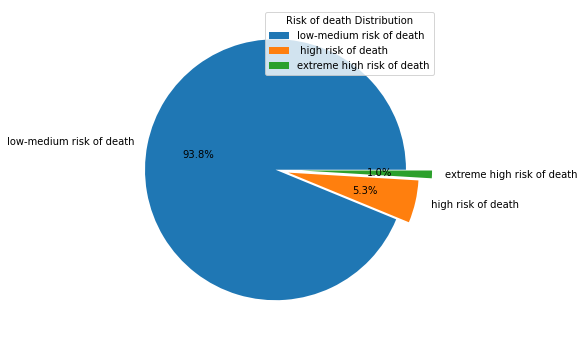

In [101]:
# plotfrequency encoding on new column 'risk of death'

a=df['Risk of Death'].value_counts()

y = a

plt.figure(figsize=(8,6))
mylabels = ["low-medium risk of death"," high risk of death","extreme high risk of death"]
plt.pie(y, explode=[0.0,0.1,0.2], autopct='%1.1f%%',labels=mylabels)
plt.legend(title = "Risk of death Distribution")

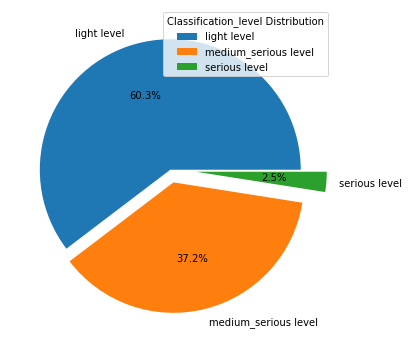

In [115]:
# plot classification level 

plt.figure(figsize=(8,6))

x = df['Classification_level'].value_counts()

labels = ['light level','medium_serious level','serious level']
plt.pie(x, explode=[0.0,0.1,0.2], autopct='%1.1f%%',labels=labels)
plt.legend(title = "Classification_level Distribution")

In [30]:
# count ICU eligeble & serious level

a = df[(df['ICU']==1)&(df['Classification_level']=='serious level')].loc[:,('ICU','Classification_level')]

,ICU,Classification_level
330729,1,serious level
943061,1,serious level
215322,1,serious level
735869,1,serious level
329457,1,serious level
...,...,...
29800,1,serious level
346242,1,serious level
462201,1,serious level
342494,1,serious level


In [203]:
#Classification_level	AGE_Bin	Risk of Death	Risk_freq_death


df.index.set_names(names=["AGE_Bin", "Risk of Death"])

ValueError: Length of new names must be 1, got 2

In [ ]:
# bins for numeraical variable age

from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=4, encode='ordinal',
                      strategy='quantile')

df['AGE'] = est.fit_transform(df[['AGE']])

df['AGE'].value_counts()

In [38]:
col_list = df.columns.tolist()
col_list

['USMER',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU',
 'AGE_Bin',
 'Classification_level',
 'Risk of Death',
 'Risk_freq_death']

In [200]:
# split X,y

df.columns.tolist()

features = ['USMER',
 'SEX',
 'PATIENT_TYPE',
 'INTUBED',
 'PNEUMONIA',
 'AGE_Bin',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'Classification_level',
 'ICU','Risk of Death',
 'Risk_freq_death']

X= df[features]
y=df['DATE_DIED']

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [201]:
# deal with missing value

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train=imputer.fit_transform(X_train)
X_test=imputer.fit_transform(X_test)

In [202]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (7863, 21)
X_test shape: (2622, 21)
y_train shape: (7863,)
y_test shape: (2622,)


In [29]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /opt/anaconda3/lib/python3.8/site-packages (2.5.1.post0)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import category_encoders as ce

categorical_columns = X
encoder = ce.OneHotEncoder(cols=X, use_cat_names=True)

X_encoded = encoder.fit_transform(X)

X_encoded

In [43]:
X_train,X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=42)

In [44]:
X_train

,USMER_1.0,USMER_2.0,SEX_2.0,SEX_1.0,PATIENT_TYPE_1.0,PATIENT_TYPE_2.0,INTUBED_97.0,INTUBED_2.0,INTUBED_1.0,INTUBED_99.0,...,ICU_97.0,ICU_1.0,ICU_2.0,ICU_99.0,Risk of Death_low-medium risk of death,Risk of Death_high risk of death,Risk of Death_extreme high risk of death,Risk_freq_death_0.9337148307105388,Risk_freq_death_0.056556986170720074,Risk_freq_death_0.009728183118741058
562095,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
834051,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
586295,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
460124,1,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
124531,1,0,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873332,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
516332,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
155258,1,0,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
217105,1,0,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [33]:
conda install -c glemaitre imbalanced-learn

^C

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [45]:
# imbalanced 

from imblearn.over_sampling import SMOTE

SMOTE = SMOTE(random_state=42)

X_resampled, y_resampled = SMOTE.fit_resample(X_train, y_train)

In [35]:
X_resampled

,USMER_1.0,USMER_2.0,SEX_female,SEX_male,PATIENT_TYPE_1.0,PATIENT_TYPE_2.0,INTUBED_nan,INTUBED_2.0,INTUBED_1.0,PNEUMONIA_2.0,...,Classification_level_medium_serious level,ICU_nan,ICU_2.0,ICU_1.0,Risk of Death_low-medium risk of death,Risk of Death_high risk of death,Risk of Death_extreme high risk of death,Risk_freq_death_0.9325703385789222,Risk_freq_death_0.0580829756795422,Risk_freq_death_0.009346685741535526
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14539,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14540,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
14541,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
14542,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [46]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_resampled)
X_train_scaled = pd.DataFrame(X_t_scaled, columns = X_train.columns)

X_s_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_s_scaled, columns = X_test.columns)

In [37]:
X_train_scaled

,USMER_1.0,USMER_2.0,SEX_female,SEX_male,PATIENT_TYPE_1.0,PATIENT_TYPE_2.0,INTUBED_nan,INTUBED_2.0,INTUBED_1.0,PNEUMONIA_2.0,...,Classification_level_medium_serious level,ICU_nan,ICU_2.0,ICU_1.0,Risk of Death_low-medium risk of death,Risk of Death_high risk of death,Risk of Death_extreme high risk of death,Risk_freq_death_0.9325703385789222,Risk_freq_death_0.0580829756795422,Risk_freq_death_0.009346685741535526
0,1.190273,-1.04042,-1.142488,1.157646,1.048045,-1.036844,1.032855,-0.655061,-0.430836,0.919994,...,-0.127876,1.032429,-0.885001,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
1,-0.840143,0.96115,-1.142488,1.157646,1.048045,-1.036844,1.032855,-0.655061,-0.430836,0.919994,...,-0.127876,1.032429,-0.885001,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
2,1.190273,-1.04042,-1.142488,1.157646,1.048045,-1.036844,1.032855,-0.655061,-0.430836,0.919994,...,-0.127876,1.032429,-0.885001,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
3,-0.840143,0.96115,-1.142488,1.157646,-0.954157,0.964465,-0.968190,1.526576,-0.430836,-1.086964,...,-0.127876,-0.968590,1.129942,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
4,1.190273,-1.04042,-1.142488,1.157646,1.048045,-1.036844,1.032855,-0.655061,-0.430836,0.919994,...,-0.127876,1.032429,-0.885001,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14539,-0.840143,0.96115,0.875283,-0.863822,-0.954157,0.964465,-0.968190,-0.655061,2.321067,-1.086964,...,-0.127876,-0.968590,-0.885001,-0.204168,-2.976632,3.304741,-0.102427,-2.976632,3.304741,-0.102427
14540,-0.840143,0.96115,0.875283,-0.863822,-0.954157,0.964465,-0.968190,-0.655061,-0.430836,-1.086964,...,-0.127876,-0.968590,1.129942,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
14541,-0.840143,0.96115,-1.142488,1.157646,-0.954157,0.964465,-0.968190,-0.655061,2.321067,0.919994,...,-0.127876,-0.968590,1.129942,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427
14542,1.190273,-1.04042,0.875283,-0.863822,-0.954157,0.964465,-0.968190,-0.655061,2.321067,-1.086964,...,-0.127876,-0.968590,1.129942,-0.204168,0.335950,-0.302596,-0.102427,0.335950,-0.302596,-0.102427


In [249]:
X_test_scaled

,USMER_2.0,USMER_1.0,SEX_male,SEX_female,PATIENT_TYPE_1.0,PATIENT_TYPE_2.0,INTUBED_nan,INTUBED_2.0,INTUBED_1.0,PNEUMONIA_2.0,...,RENAL_CHRONIC_nan,TOBACCO_2.0,TOBACCO_1.0,TOBACCO_nan,Classification_level_serious level,Classification_level_light level,Classification_level_medium_serious level,ICU_nan,ICU_2.0,ICU_1.0
0,0.939272,-0.898669,-0.849105,0.858373,1.047901,-1.035703,1.027326,-0.677330,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,1.027326,-0.910227,-0.176212
1,0.939272,-0.898669,1.177710,-1.164995,-0.954289,0.965528,-0.973401,1.476385,-0.422053,-1.153104,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,-0.973401,1.098627,-0.176212
2,-1.064655,1.112757,1.177710,-1.164995,-0.954289,0.965528,1.027326,-0.677330,-0.422053,-1.153104,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,1.027326,-0.910227,-0.176212
3,0.939272,-0.898669,1.177710,-1.164995,1.047901,-1.035703,1.027326,-0.677330,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,1.027326,-0.910227,-0.176212
4,-1.064655,1.112757,1.177710,-1.164995,1.047901,-1.035703,1.027326,-0.677330,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,1.027326,-0.910227,-0.176212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,-1.064655,1.112757,1.177710,-1.164995,-0.954289,0.965528,-0.973401,1.476385,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,-0.973401,1.098627,-0.176212
2618,0.939272,-0.898669,1.177710,-1.164995,1.047901,-1.035703,1.027326,-0.677330,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,1.027326,-0.910227,-0.176212
2619,-1.064655,1.112757,1.177710,-1.164995,1.047901,-1.035703,1.027326,-0.677330,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,1.219428,-1.032002,-0.135443,1.027326,-0.910227,-0.176212
2620,-1.064655,1.112757,1.177710,-1.164995,1.047901,-1.035703,1.027326,-0.677330,-0.422053,0.867224,...,-0.056328,0.327136,-0.25193,-0.059321,-0.820057,0.968990,-0.135443,1.027326,-0.910227,-0.176212


In [250]:
y_train

1015380    0
142723     0
405393     0
41298      1
1010944    0
          ..
1026824    0
101820     0
858310     0
911025     0
816947     0
Name: DATE_DIED, Length: 7863, dtype: category
Categories (2, int64): [0, 1]

## Train Baseline Model and Hyperparamter tuning

### Decision Tree Model 

In [48]:
# Decision Tree

dt = DecisionTreeClassifier()

dt.fit(X_train_scaled, y_resampled)

y_pred = dt.predict(X_test_scaled)

In [49]:
y_test.shape

(2622,)

In [254]:
y_pred.shape

(2622,)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2444
           1       0.46      0.52      0.49       178

    accuracy                           0.93      2622
   macro avg       0.71      0.74      0.72      2622
weighted avg       0.93      0.93      0.93      2622



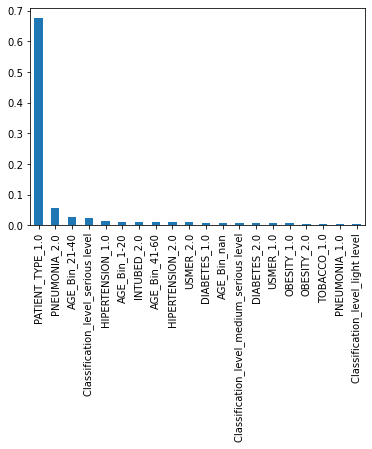

In [52]:
pd.Series(dt.feature_importances_,index=X_encoded.columns).sort_values(ascending=False).head(20).plot(kind='bar')

In [58]:
pd.Series(dt.feature_importances_,index=X_encoded.columns).sort_values(ascending=False).head(20)

PATIENT_TYPE_1.0                             0.674751
PNEUMONIA_2.0                                0.055592
AGE_Bin_21-40                                0.026192
Classification_level_serious level           0.023928
HIPERTENSION_1.0                             0.015541
AGE_Bin_1-20                                 0.011954
INTUBED_2.0                                  0.011077
AGE_Bin_41-60                                0.010704
HIPERTENSION_2.0                             0.010348
USMER_2.0                                    0.010236
DIABETES_1.0                                 0.008592
AGE_Bin_nan                                  0.008077
Classification_level_medium_serious level    0.007655
DIABETES_2.0                                 0.007636
USMER_1.0                                    0.007539
OBESITY_1.0                                  0.007152
OBESITY_2.0                                  0.006098
TOBACCO_1.0                                  0.006025
PNEUMONIA_1.0               

In [67]:
feature = ["PATIENT_TYPE_1.0","PNEUMONIA_2.0","AGE_Bin_21-40","Classification_level_serious level","HIPERTENSION_1.0","AGE_Bin_1-20","INTUBED_2.0","AGE_Bin_41-60","HIPERTENSION_2.0","USMER_2.0","DIABETES_1.0","AGE_Bin_nan","Classification_level_medium_serious level","DIABETES_2.0","USMER_1.0","OBESITY_1.0","OBESITY_2.0","TOBACCO_1.0","PNEUMONIA_1.0","PNEUMONIA_1.0","Classification_level_light level"]

#X_train_new = X_train_scaled[feature]

#X_train_new

X_scaled_new = pd.concat([X_train_scaled,X_test_scaled])

X_train_new = X_scaled_new[feature]



In [39]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Grid Search Decision Tree

param_grid = {'max_features': ['auto','sqrt','log2'],
             'ccp_alpha':[0.1,0.01],
              'max_depth':[5,6,7,8,9],
               'criterion':['gini','entropy']}


DT_Tuned = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)

DT_Tuned.fit(X_train_scaled, y_resampled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [80]:
final_DT = DT_Tuned.best_estimator_

final_DT

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='auto')

In [35]:
DT_Tuned.best_score_

0.9064206657420906

In [81]:
#
y_predict_dt = DT_Tuned.predict(X_test_scaled)

In [82]:
print(classification_report(y_predict_dt,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2350
           1       0.64      0.42      0.51       272

    accuracy                           0.92      2622
   macro avg       0.79      0.70      0.73      2622
weighted avg       0.90      0.92      0.91      2622



### KNN model

In [98]:
#KNN

test_score = []
train_score =[]

for i in range(1,8):

    knn = KNeighborsClassifier(n_neighbors = i)

    knn =knn.fit(X_train_scaled, y_resampled)
    y_pred_knn = knn.predict(X_test_scaled)
    train_score.append(knn.score(X_train_scaled, y_resampled))
   # test_score.append(knn.score(X_test_scaled, y_test)）

In [99]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2365
           1       0.62      0.43      0.51       257

    accuracy                           0.92      2622
   macro avg       0.78      0.70      0.73      2622
weighted avg       0.91      0.92      0.91      2622



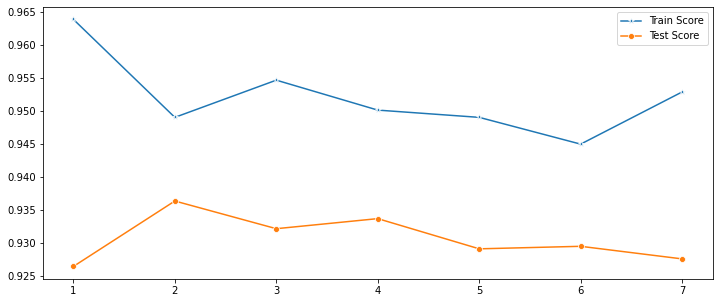

In [199]:
plt.figure(figsize=(12,5))

p = sns.lineplot(range(1,8), train_score, marker='*', label='Train Score')

p = sns.lineplot(range(1,8), test_score, marker='o', label='Test Score')

In [206]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

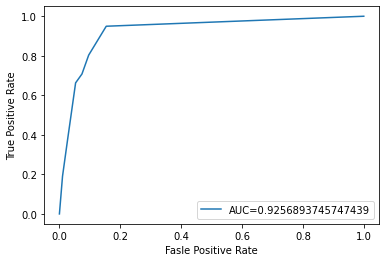

In [207]:
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('Fasle Positive Rate')
plt.legend(loc=4)

In [100]:
metrics = ['euclidean','manhattan']

neighbors = np.arange(1,8)

param_grid = dict(metric=metrics, n_neighbors=neighbors)
param_grid 

{'metric': ['euclidean', 'manhattan'],
 'n_neighbors': array([1, 2, 3, 4, 5, 6, 7])}

In [102]:
# Tune hyperparameters

grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='recall')

Tuned_knn = grid_search.fit(X_train_scaled,y_resampled)

y_pred_knn_t = Tuned_knn.predict(X_test_scaled)

In [103]:
Tuned_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [104]:
print(classification_report(y_pred_knn_t,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2342
           1       0.67      0.43      0.52       280

    accuracy                           0.92      2622
   macro avg       0.80      0.70      0.74      2622
weighted avg       0.91      0.92      0.91      2622



### SVC model 

In [105]:
# SVC Baseline Model 

kernels = ["linear", "poly", "rbf"]

svm_features = {}
svm_best_result = 0

for kernel in kernels:
    
    # create a SVM classifier instance and compute the prediction
    svm_classifier = SVC(kernel='sigmoid', degree=8, class_weight='balanced')
    
    svm_classifier.fit(X_train_scaled,y_resampled)
    
    y_pred = svm_classifier.predict(X_test_scaled)

In [106]:
 y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2444
           1       0.31      0.74      0.43       178

    accuracy                           0.87      2622
   macro avg       0.64      0.81      0.68      2622
weighted avg       0.93      0.87      0.89      2622



In [108]:
param={'kernel':('linear','poly','rbf','sigmoid'),
      'C':[1,5],
       'degree':[3,8],
       'gamma':('auto','scale')}


In [109]:
Grids = GridSearchCV(svm_classifier, param, cv =3)

SVC_Tuned=Grids.fit(X_train_scaled,y_resampled)

In [110]:
y_pred_svc = SVC_Tuned.predict(X_test_scaled)

In [111]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2444
           1       0.47      0.57      0.52       178

    accuracy                           0.93      2622
   macro avg       0.72      0.76      0.74      2622
weighted avg       0.93      0.93      0.93      2622



In [55]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2444
           1       0.45      0.70      0.55       178

    accuracy                           0.92      2622
   macro avg       0.72      0.82      0.75      2622
weighted avg       0.94      0.92      0.93      2622



### Xgboost

In [88]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 2.3 MB/s eta 0:00:01     |████████████████████████████████| 1.8 MB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [145]:
xgb.

NameError: name 'xgboost' is not defined

In [154]:
import xgboost as xgb

In [155]:
xgb.__version__

'1.7.1'

In [90]:
# xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, max_depth=8, learing_rate=0.1, subsample=0.5)

xgb_model = xgb.fit(X_train_scaled,y_resampled)

xgb_pred = xgb_model.predict(X_test_scaled)

print(classification_report(y_test, xgb_pred))

[12:31:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "learing_rate" } are not used.

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2444
           1       0.49      0.59      0.53       178

    accuracy                           0.93      2622
   macro avg       0.73      0.77      0.75      2622
weighted avg       0.94      0.93      0.93      2622



In [91]:
# Gridsearch, Hyperparameter Tunning

param_grid={
    "max_depth":[3,4,5,7],
    "learning_rate":[0.1, 0.01, 0.05],#how quickly the model fits the residual errors by using additional base learners.
    "gamma": [0, 0.25, 1],# type of regularization: minimum svc & sloss reduction to create new split
    "scale_pos_weight": [1, 3, 5],
    "subsample":[0.8],# fraction of training set that can be used to train each train
    "colsample_bytree":[0.5]# fraction of features that can be used to train each tree
}

gsearch = GridSearchCV(xgb_model, param_grid, n_jobs=-1, cv=3, scoring="recall" )


In [92]:
xgb_tuned = gsearch.fit(X_train_scaled, y_resampled)
y_pred_xgb = xgb_tuned.predict(X_test_scaled)

[12:39:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "learing_rate" } are not used.



In [93]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2444
           1       0.34      0.94      0.50       178

    accuracy                           0.87      2622
   macro avg       0.67      0.90      0.71      2622
weighted avg       0.95      0.87      0.90      2622



### Deep learing model

In [80]:
import tensorflow as tf
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [73]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=500, activation='relu',input_shape=X_train_scaled.shape[1:]))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(X_train_scaled.shape[1], activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 500)               29000     
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 500)               250500    
                                                                 
 dense_12 (Dense)            (None, 57)                28557     
                                                                 
 dense_13 (Dense)            (None, 1)                 58        
                                                                 
Total params: 558,615
Trainable params: 558,615
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [49]:
#model.add(tf.keras.layer.Dense(256, input_shape=(X_train_scaled.shape[1:],), activation='sigmoid'))

In [76]:
history = model.fit(X_train_scaled, y_resampled, validation_split=0.1,epochs=50, batch_size=50)

#y_pred = model.predict(X_test_scaled)

#y_pred

Epoch 1/50
262/262 [==============================] - 6s 15ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 2/50
262/262 [==============================] - 3s 13ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 3/50
262/262 [==============================] - 5s 19ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 4/50
262/262 [==============================] - 5s 18ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 5/50
262/262 [==============================] - 4s 16ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 6/50
262/262 [==============================] - 4s 16ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss: 15.4250 - val_accuracy: 0.0000e+00
Epoch 7/50
262/262 [==============================] - 4s 16ms/step - loss: 6.8551 - accuracy: 0.5556 - val_loss:

In [84]:
model.evaluate(X_test_scaled, y_test)

82/82 [==============================] - 0s 5ms/step - loss: 1.0472 - accuracy: 0.9321


[1.047155499458313, 0.9321128726005554]

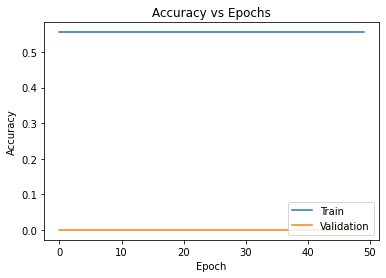

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [85]:
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test_scaled, verbose=0)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [46]:
recall = recall_score(y_test, yhat_classes)

In [61]:
# Clearing the backend
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense, Dropout, Activation

backend.clear_session()

In [63]:
model_2  = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Dense(units=500, activation='tanh',input_shape=X_train_scaled.shape[1:]))
model_2.add(Dropout(0.1))
model_2.add(tf.keras.layers.Dense(units=500, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(tf.keras.layers.Dense(units=500, activation='tanh'))
model_2.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(X_train_scaled.shape[1], activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1))

In [67]:
model_2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [68]:
history_2 = model_2.fit(X_train_scaled, y_resampled,
                       validation_split=0.1,
                       epochs = 50,
                       verbose=2)

Epoch 1/50
410/410 - 6s - loss: 1.3719 - accuracy: 0.0045 - val_loss: 1.2549 - val_accuracy: 0.0000e+00 - 6s/epoch - 15ms/step
Epoch 2/50
410/410 - 5s - loss: 1.3163 - accuracy: 0.0016 - val_loss: 0.5000 - val_accuracy: 0.0000e+00 - 5s/epoch - 11ms/step
Epoch 3/50
410/410 - 5s - loss: 1.2620 - accuracy: 0.0074 - val_loss: 0.3991 - val_accuracy: 0.0000e+00 - 5s/epoch - 11ms/step
Epoch 4/50
410/410 - 4s - loss: 1.4777 - accuracy: 0.0038 - val_loss: 0.4240 - val_accuracy: 0.0000e+00 - 4s/epoch - 11ms/step
Epoch 5/50
410/410 - 5s - loss: 1.3852 - accuracy: 0.0054 - val_loss: 1.2035 - val_accuracy: 0.0000e+00 - 5s/epoch - 12ms/step
Epoch 6/50
410/410 - 5s - loss: 1.5087 - accuracy: 0.0069 - val_loss: 0.5389 - val_accuracy: 0.0000e+00 - 5s/epoch - 13ms/step
Epoch 7/50
410/410 - 6s - loss: 1.4879 - accuracy: 0.0027 - val_loss: 0.4281 - val_accuracy: 0.0000e+00 - 6s/epoch - 15ms/step
Epoch 8/50
410/410 - 5s - loss: 1.3895 - accuracy: 0.0035 - val_loss: 0.3484 - val_accuracy: 0.0000e+00 - 5s/ep

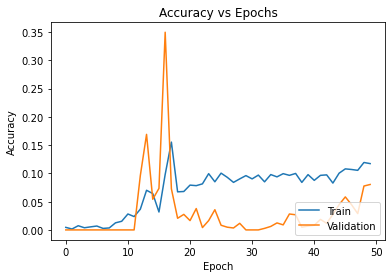

In [69]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [71]:
model_2.evaluate(X_test_scaled, y_test)

82/82 [==============================] - 0s 4ms/step - loss: 0.8613 - accuracy: 0.3688


[0.8612683415412903, 0.36880242824554443]

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2444
           1       0.50      0.53      0.52       178

    accuracy                           0.93      2622
   macro avg       0.73      0.75      0.74      2622
weighted avg       0.93      0.93      0.93      2622



## Stacking 

In [73]:
dt =  DecisionTreeClassifier()
svc = SVC()
knn =  KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=100, max_depth=8, learing_rate=0.1, subsample=0.5)

In [58]:
# perform cross-validation and record the scores
clf = [dt, svc, knn, xgb]

for algo in clf:
    
    score = cross_val_score(algo,X_train_scaled,y_resampled, cv=5, scoring='accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.9590907693857181
The accuracy score of SVC() is: 0.9542779062086406
The accuracy score of KNeighborsClassifier() is: 0.9422451453843145
[20:53:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "learing_rate" } are not used.

[20:53:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "learing_rate" } are not used.

[20:53:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "learing_rate" } are not used.

[20:53:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "learing_rate" } are not used.

[20:53:26] WARNING: /Users/runner/work/xgboost/xgboost/python-packa

In [74]:
# perform stacking and cross validation

dt =  DecisionTreeClassifier()
svc = SVC()
knn =  KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=100, max_depth=8,  subsample=0.5)

clf = [('dt',dt),('svc',svc),('knn',knn),('xgb',xgb)]

clk= [('dt',dt),('svc',svc)]

clh = [('dt',dt),('knn',knn)]

clj = [('svc',svc),('xgb',xgb)]

clx = [('xgb',xgb),('knn',knn)]

In [75]:
from sklearn.ensemble import StackingClassifier
from sklearn import metrics

In [76]:
# define scoring for recall metrics

scorer =  metrics.make_scorer(recall_score , pos_label=1)

In [70]:

lr = LogisticRegression()

stack_model = StackingClassifier(estimators = clf, final_estimator = lr)

score = cross_val_score(stack_model, X_train_scaled,y_resampled,scoring=scorer)

print("The recall score of is:", score.mean())

The recall score of is: 0.9576364762215384


In [77]:
# ('dt',dt),('svc',svc)]

lr = LogisticRegression()

stack_model = StackingClassifier(estimators = clk, final_estimator = lr)

score = cross_val_score(stack_model, X_train_scaled,y_resampled,scoring=scorer)

print("The recall score of is:", score.mean())

The recall score of is: 0.9596992772633379


In [78]:
#[('dt',dt),('knn',knn)]

lr = LogisticRegression()

stack_model = StackingClassifier(estimators = clh, final_estimator = lr)

score = cross_val_score(stack_model, X_train_scaled,y_resampled,scoring=scorer)

print("The recall score of is:", score.mean())

The recall score of is: 0.9559881261314918


In [79]:
#[('svc',svc),('xgb',xgb)]

lr = LogisticRegression()

stack_model = StackingClassifier(estimators = clj, final_estimator = lr)

score = cross_val_score(stack_model, X_train_scaled,y_resampled,scoring=scorer)

print("The recall score of is:", score.mean())

The recall score of is: 0.95804856374405


In [80]:
#[('xgb',xgb),('knn',knn)]


lr = LogisticRegression()

stack_model = StackingClassifier(estimators = clx, final_estimator = lr)

score = cross_val_score(stack_model, X_train_scaled,y_resampled,scoring=scorer)

print("The recall score of is:", score.mean())

The recall score of is: 0.9584618802497673


### mean accuracy for all models

In [71]:
# caculate accuracy for combining all models

lr = LogisticRegression()

stack_model = StackingClassifier(estimators = clf, final_estimator = lr)

score = cross_val_score(stack_model, X_train_scaled,y_resampled,scoring='accuracy')

print("The accuracy score of is:", score.mean())

The accuracy score of is: 0.9577157973428762


## Model Interpretation using Lime-general 

In [106]:
! pip install lime

In [258]:
nn = MLPClassifier((50, 50), random_state=2)

nn.fit(X_train_scaled, y_resampled)

y_prob = nn.predict_proba(X_test)[:, 1]

In [259]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train_scaled.values,
                                feature_names=X_train_scaled.columns.values,
                                class_names=[0,1])

In [84]:
X_test_scaled.head()

,USMER_1.0,USMER_2.0,SEX_2.0,SEX_1.0,PATIENT_TYPE_1.0,PATIENT_TYPE_2.0,INTUBED_97.0,INTUBED_2.0,INTUBED_1.0,INTUBED_99.0,...,ICU_97.0,ICU_1.0,ICU_2.0,ICU_99.0,Risk of Death_low-medium risk of death,Risk of Death_high risk of death,Risk of Death_extreme high risk of death,Risk_freq_death_0.9337148307105388,Risk_freq_death_0.056556986170720074,Risk_freq_death_0.009728183118741058
0,-0.839429,0.947211,-1.104130,1.117567,1.067304,-1.058648,1.067304,-0.679924,-0.417975,-0.098588,...,1.067304,-0.209946,-0.891318,-0.098231,0.342127,-0.312109,-0.108752,0.342127,-0.312109,-0.108752
1,-0.839429,0.947211,-1.104130,1.117567,1.067304,-1.058648,1.067304,-0.679924,-0.417975,-0.098588,...,1.067304,-0.209946,-0.891318,-0.098231,-2.922894,3.204011,-0.108752,-2.922894,3.204011,-0.108752
2,-0.839429,0.947211,0.905691,-0.894801,1.067304,-1.058648,1.067304,-0.679924,-0.417975,-0.098588,...,1.067304,-0.209946,-0.891318,-0.098231,0.342127,-0.312109,-0.108752,0.342127,-0.312109,-0.108752
3,1.191286,-1.055731,-1.104130,1.117567,1.067304,-1.058648,1.067304,-0.679924,-0.417975,-0.098588,...,1.067304,-0.209946,-0.891318,-0.098231,0.342127,-0.312109,-0.108752,0.342127,-0.312109,-0.108752
4,-0.839429,0.947211,-1.104130,1.117567,1.067304,-1.058648,1.067304,-0.679924,-0.417975,-0.098588,...,1.067304,-0.209946,-0.891318,-0.098231,-2.922894,-0.312109,9.195267,-2.922894,-0.312109,9.195267


In [260]:
patient_id = 256

# get the expanation from the black box model
exp = explainer.explain_instance(X_test_scaled.loc[patient_id],nn.predict_proba)

exp.show_in_notebook()

## Explain Model Prediction using shap--on best model

In [87]:
conda install -c conda-forge shap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.35.0                |   py38h5fc983b_0         390 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         390 KB

The following NEW packages will be INSTALLED:

  shap               conda-forge/osx-64::shap-0.35.0-py38h5fc983b_0 None

The following packages w

In [125]:
import shap
shap.initjs()

In [137]:
X_train_scaled.shape


(14544, 66)

In [156]:
xgb.__version__

'1.7.1'

In [157]:
xgb = xgboost.XGBClassifier(random_state=42)

mymodel = xgb.fit(X_train_scaled, y_resampled)
mybooster = mymodel.get_booster()


model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

# Shap explainer initilization
shap_ex = shap.TreeExplainer(mybooster)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [161]:
shap_values=shap_ex.shap_values(X_train_scaled)

In [164]:
#i = 4

#shap.force_plot(explainer.expected_values, shap_values[i],
               #features=X_train.iloc[i], feature_names=X_train_scaled.columns)

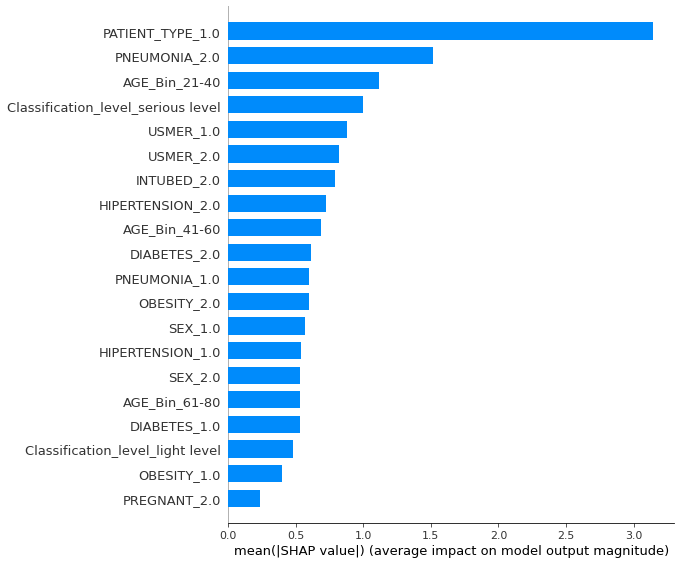

In [162]:
# show the distribution of the impacts each feature has on the model output. 

shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X_train_scaled.columns, plot_type='bar')

In [235]:
# use new feature re-train xgb model

features = ['PATIENT_TYPE',
 'PNEUMONIA',
 'AGE_Bin',
 'USMER',
 
 'INTUBED',
 'HIPERTENSION',
 'AGE_Bin',
 'DIABETES',
 'PNEUMONIA',
 'OBESITY',
 'SEX',
 'HIPERTENSION',

 'DIABETES',
 'Classification_level',
 'OBESITY',
 'Risk_freq_death']

X= df[features]
y=df['DATE_DIED']



In [ ]:
import category_encoders as ce

categorical_columns = X
encoder = ce.OneHotEncoder(cols=X, use_cat_names=True)

X_encoded = encoder.fit_transform(X)

X_encoded

In [243]:
X_train,X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=42)

In [241]:
X_encoded

,USMER_1.0,USMER_2.0,SEX_male,SEX_female,PATIENT_TYPE_1.0,PATIENT_TYPE_2.0,INTUBED_nan,INTUBED_2.0,INTUBED_1.0,PNEUMONIA_2.0,...,Classification_level_medium_serious level,ICU_nan,ICU_2.0,ICU_1.0,Risk of Death_low-medium risk of death,Risk of Death_high risk of death,Risk of Death_extreme high risk of death,Risk_freq_death_0.9335240820219362,Risk_freq_death_0.05731998092513114,Risk_freq_death_0.009155937052932762
737534,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
559382,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
475951,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
133093,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
441327,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54297,0,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
461907,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
54803,1,0,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
58628,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [242]:
y

695765    0
670341    0
915289    0
946495    0
580520    0
         ..
465869    1
49945     1
468834    1
37411     1
28131     1
Name: DATE_DIED, Length: 10485, dtype: category
Categories (2, int64): [0, 1]

In [245]:
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE(random_state=42)

X_resampled, y_resampled = SMOTE.fit_resample(X_train, y_train)

In [247]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_resampled)
X_train_scaled = pd.DataFrame(X_t_scaled, columns = X_train.columns)

X_s_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_s_scaled, columns = X_test.columns)

In [251]:
xgb = xgboost.XGBClassifier(random_state=42)

In [253]:
xgb_new =xgb.fit(X_train_scaled, y_resampled)
y_pred__new_xgb = xgb_new.predict(X_test_scaled)

In [256]:
print(classification_report(y_pred__new_xgb, y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2422
           1       0.63      0.56      0.59       200

    accuracy                           0.94      2622
   macro avg       0.80      0.77      0.78      2622
weighted avg       0.94      0.94      0.94      2622

